### <i> Analyze Trends and Determination of Loeading causes of deaths in US </i>
### <i> Import Library Files </i>

In [2]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore")
import pandas as pd

In [3]:
df = pd.read_csv("NCHS_-_Leading_Causes_of_Death__United_States.csv")

In [4]:
df

,Year,113 Cause Name,Cause Name,State,Deaths,Age-adjusted Death Rate
0,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,United States,169936,49.4
1,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alabama,2703,53.8
2,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Alaska,436,63.7
3,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arizona,4184,56.2
4,2017,"Accidents (unintentional injuries) (V01-X59,Y8...",Unintentional injuries,Arkansas,1625,51.8
...,...,...,...,...,...,...
10863,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Virginia,1035,16.9
10864,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Washington,278,5.2
10865,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,West Virginia,345,16.4
10866,1999,"Nephritis, nephrotic syndrome and nephrosis (N...",Kidney disease,Wisconsin,677,11.9


### <i> Dataset Overview </i>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10868 entries, 0 to 10867
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     10868 non-null  int64  
 1   113 Cause Name           10868 non-null  object 
 2   Cause Name               10868 non-null  object 
 3   State                    10868 non-null  object 
 4   Deaths                   10868 non-null  int64  
 5   Age-adjusted Death Rate  10868 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 509.6+ KB


In [7]:
df.describe()

,Year,Deaths,Age-adjusted Death Rate
count,10868.000000,1.086800e+04,10868.000000
mean,2008.000000,1.545991e+04,127.563894
std,5.477478,1.128760e+05,223.639771
min,1999.000000,2.100000e+01,2.600000
25%,2003.000000,6.120000e+02,19.200000
50%,2008.000000,1.718500e+03,35.900000
75%,2013.000000,5.756500e+03,151.725000
max,2017.000000,2.813503e+06,1087.300000


### <i> Data PReprocessing </i>

In [9]:
# Rename columns for easier access
df.columns = ['Year', 'Cause_Name', 'Cause_Name_Duplicated', 'State', 'Deaths', 'Age_Adjusted_Death_Rate']

# Drop the duplicated column
df = df.drop(columns=['Cause_Name_Duplicated'])

# Check for any missing values
print(df.isnull().sum())

# Handle missing values (if any)
# Example: df = df.dropna()  # Uncomment if you want to drop rows with missing values

# Descriptive statistics
print(df.describe())

Year                       0
Cause_Name                 0
State                      0
Deaths                     0
Age_Adjusted_Death_Rate    0
dtype: int64
               Year        Deaths  Age_Adjusted_Death_Rate
count  10868.000000  1.086800e+04             10868.000000
mean    2008.000000  1.545991e+04               127.563894
std        5.477478  1.128760e+05               223.639771
min     1999.000000  2.100000e+01                 2.600000
25%     2003.000000  6.120000e+02                19.200000
50%     2008.000000  1.718500e+03                35.900000
75%     2013.000000  5.756500e+03               151.725000
max     2017.000000  2.813503e+06              1087.300000


### <i> EDA Expolatory Data Analysis </i>

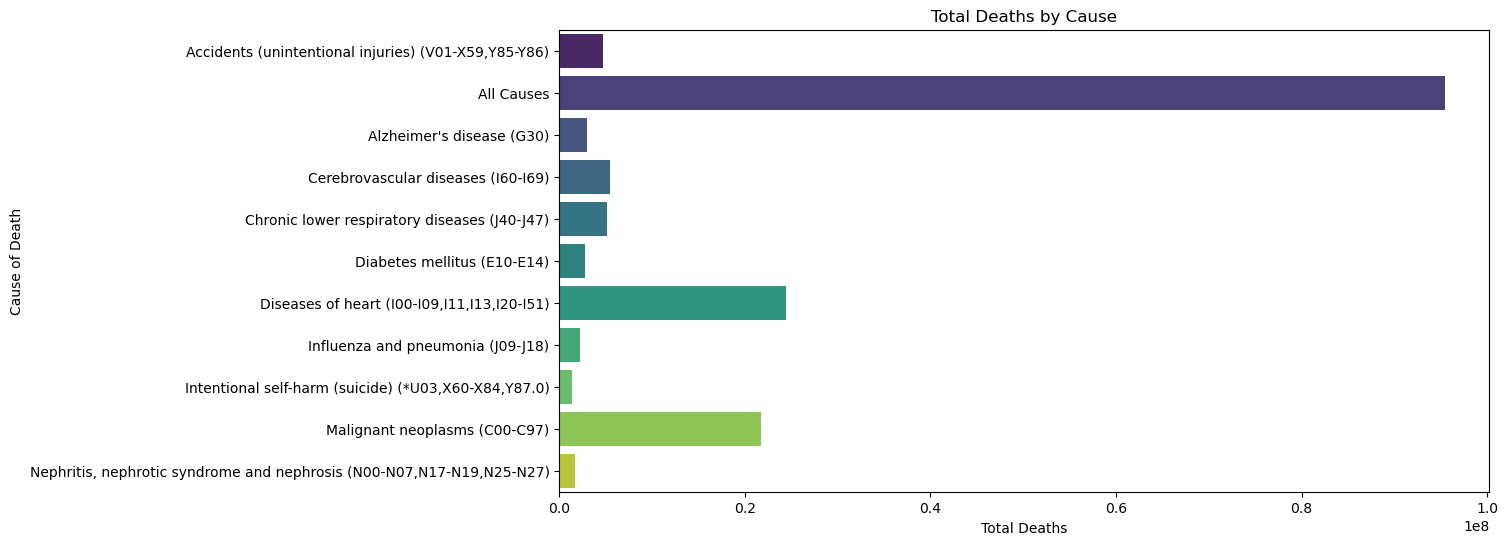

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# EDA Visualizations

# 1. Total deaths per cause
plt.figure(figsize=(12, 6))
sns.barplot(x='Deaths', y='Cause_Name', data=df, estimator=sum, ci=None, palette='viridis')
plt.title('Total Deaths by Cause')
plt.xlabel('Total Deaths')
plt.ylabel('Cause of Death')
plt.show()

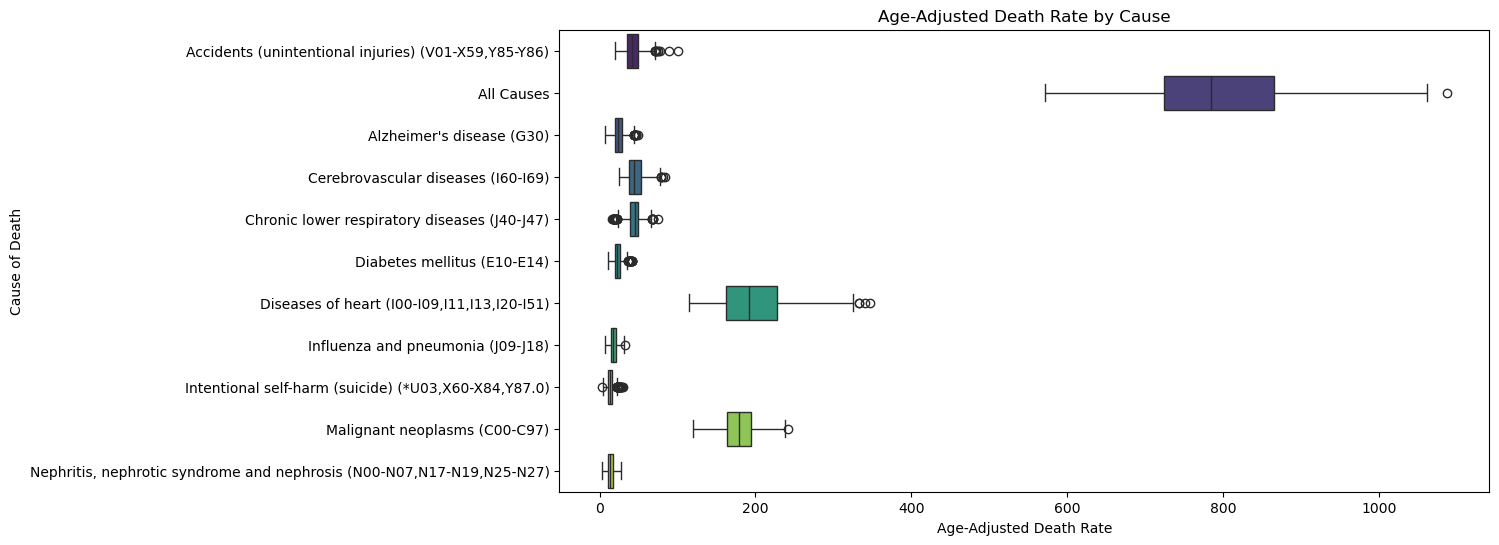

In [12]:
# 2. Age-adjusted death rate by cause
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age_Adjusted_Death_Rate', y='Cause_Name', data=df, palette='viridis')
plt.title('Age-Adjusted Death Rate by Cause')
plt.xlabel('Age-Adjusted Death Rate')
plt.ylabel('Cause of Death')
plt.show()

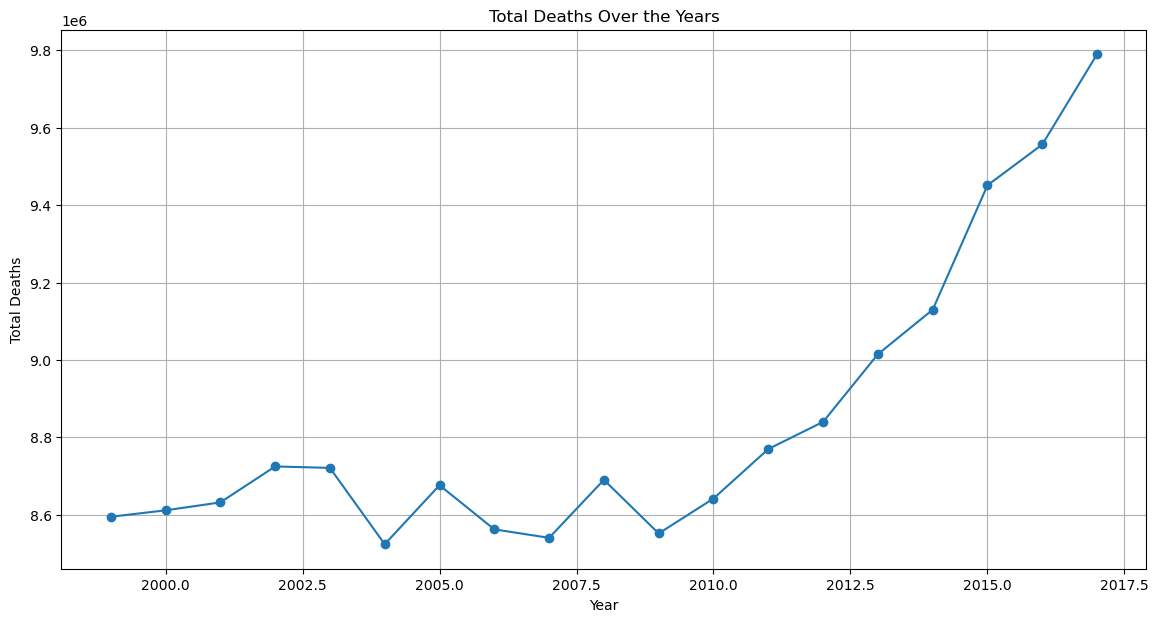

In [13]:
# 3. Total deaths over the years
plt.figure(figsize=(14, 7))
df.groupby('Year')['Deaths'].sum().plot(kind='line', marker='o')
plt.title('Total Deaths Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.grid()
plt.show()


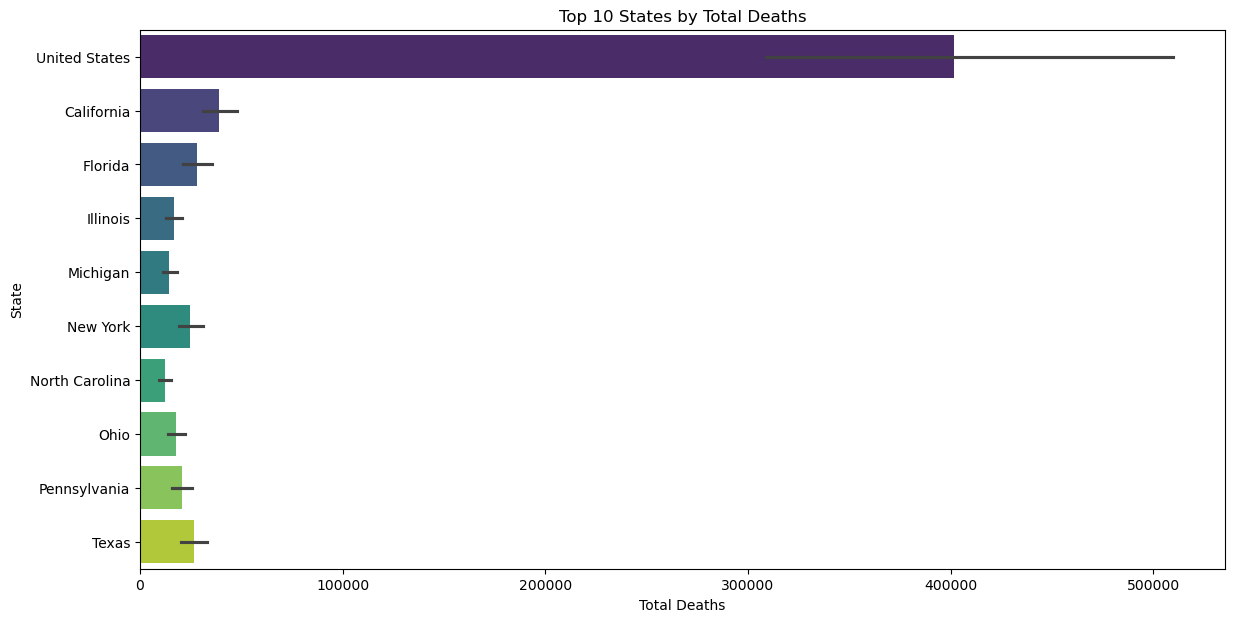

In [14]:

# 4. Deaths by State
plt.figure(figsize=(14, 7))
top_states = df.groupby('State')['Deaths'].sum().nlargest(10).index
sns.barplot(x='Deaths', y='State', data=df[df['State'].isin(top_states)], palette='viridis')
plt.title('Top 10 States by Total Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('State')
plt.show()

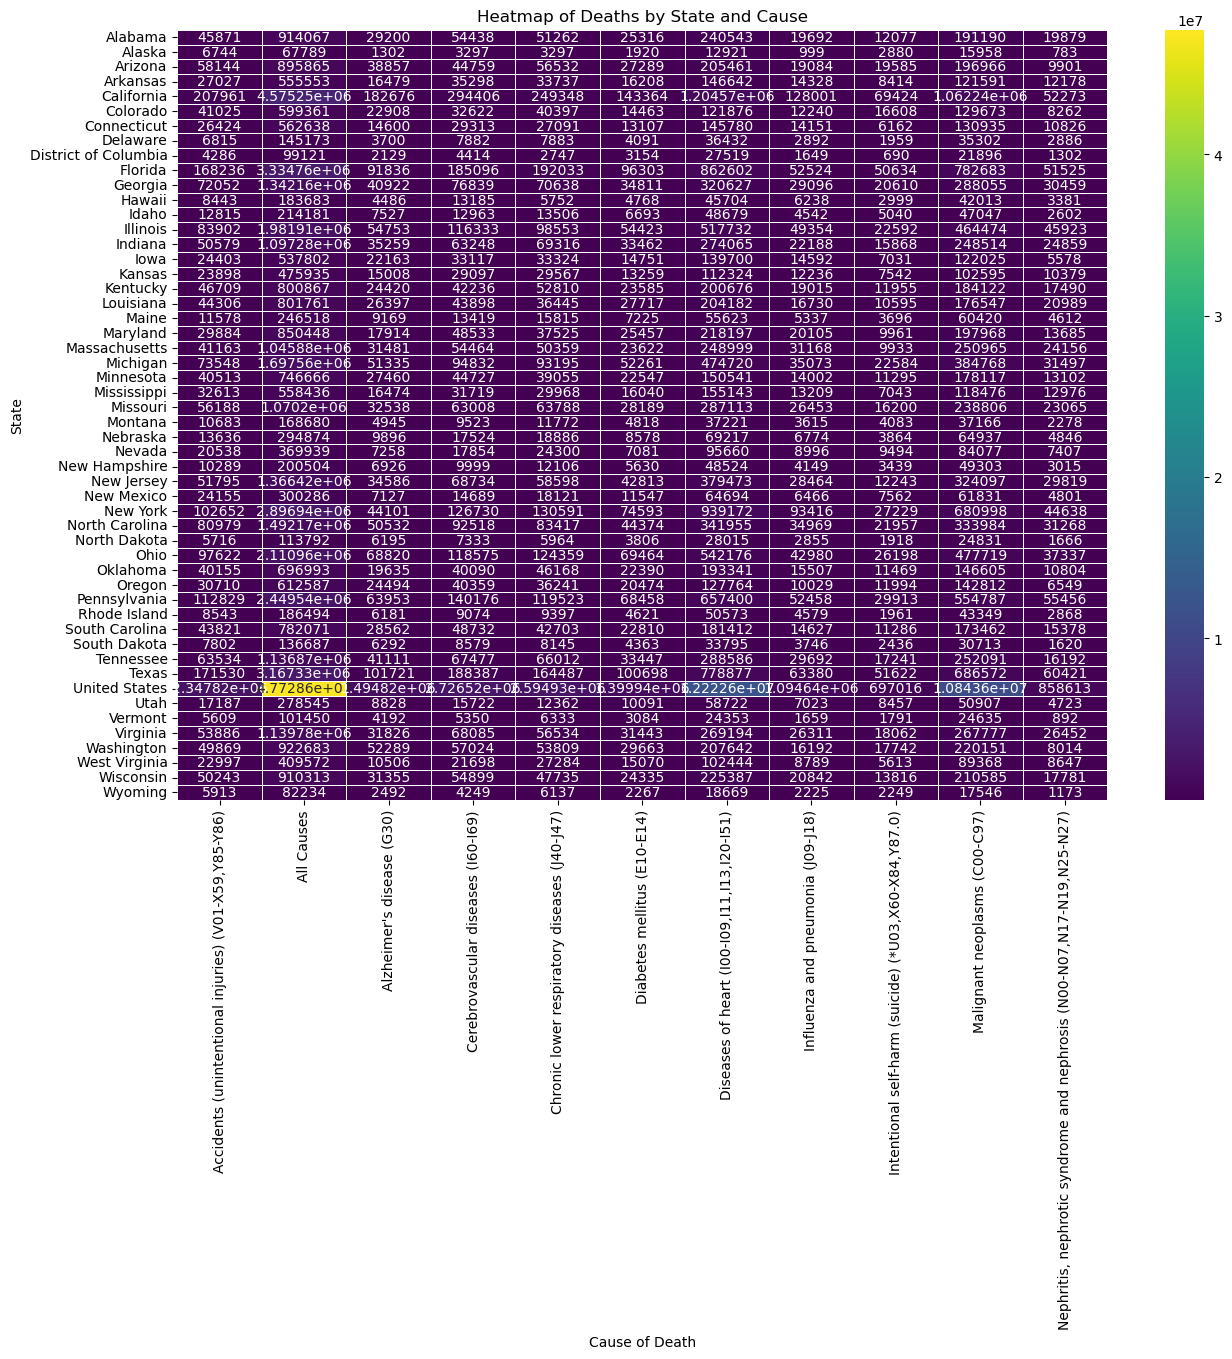

In [15]:
# Heatmap of Deaths by State and Cause
death_matrix = df.pivot_table(values='Deaths', index='State', columns='Cause_Name', aggfunc='sum')
plt.figure(figsize=(15, 10))
sns.heatmap(death_matrix, cmap='viridis', annot=True, fmt='g', linewidths=.5)
plt.title('Heatmap of Deaths by State and Cause')
plt.xlabel('Cause of Death')
plt.ylabel('State')
plt.show()

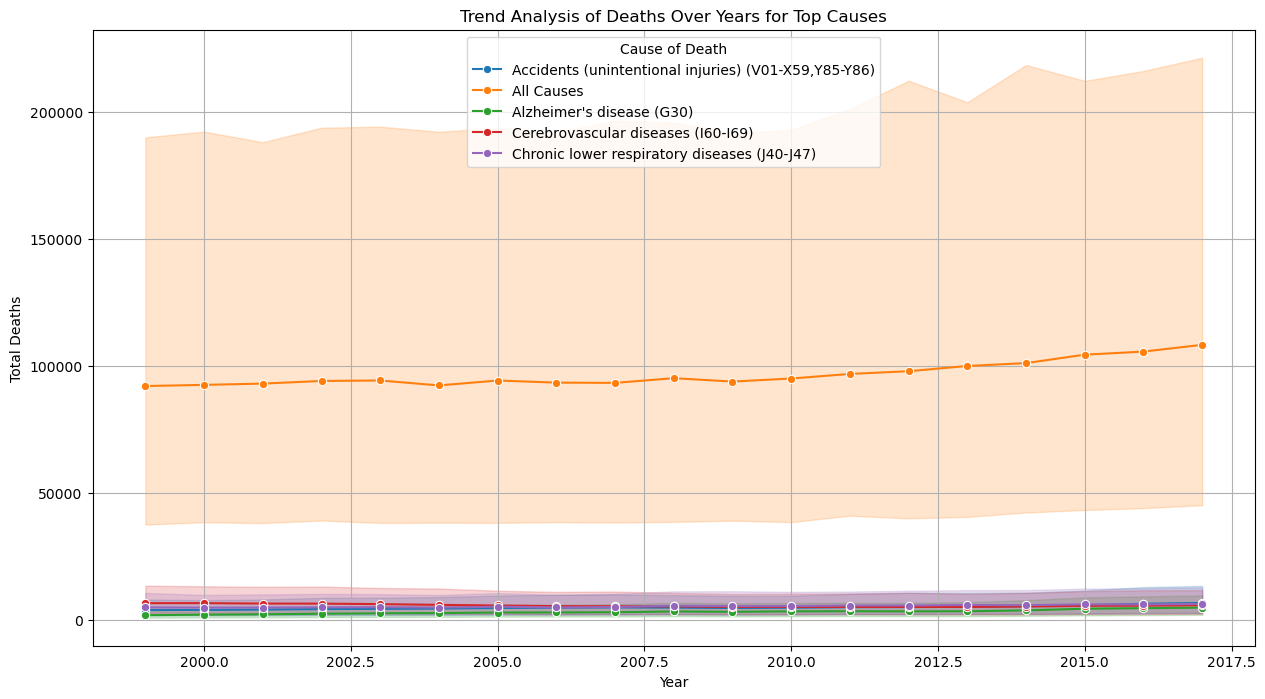

In [16]:
# Trend Analysis of Deaths Over Years for Top Causes
top_causes = df['Cause_Name'].value_counts().nlargest(5).index
top_causes_data = df[df['Cause_Name'].isin(top_causes)]

plt.figure(figsize=(15, 8))
sns.lineplot(data=top_causes_data, x='Year', y='Deaths', hue='Cause_Name', marker='o')
plt.title('Trend Analysis of Deaths Over Years for Top Causes')
plt.xlabel('Year')
plt.ylabel('Total Deaths')
plt.legend(title='Cause of Death')
plt.grid()
plt.show()


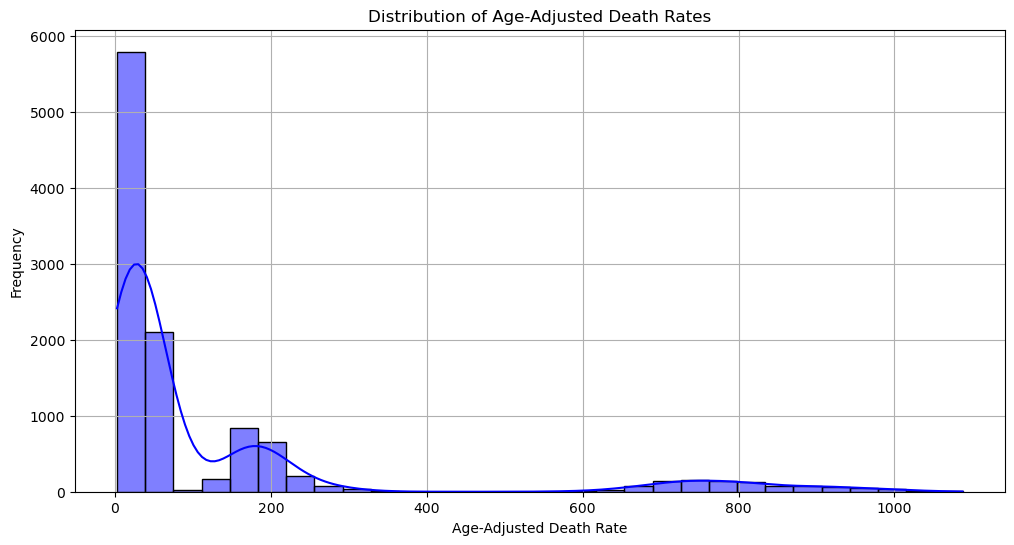

In [17]:
# Distribution of Age-Adjusted Death Rates
plt.figure(figsize=(12, 6))
sns.histplot(df['Age_Adjusted_Death_Rate'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age-Adjusted Death Rates')
plt.xlabel('Age-Adjusted Death Rate')
plt.ylabel('Frequency')
plt.grid()
plt.show()

### <i> Modeling </i>
### <i> Linear Regression </i>

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
# Preprocessing for ML
X = df[['Deaths']]  # Features
y = df['Age_Adjusted_Death_Rate']  # Target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Metrics:")
print("Mean Absolute Error:", mae_lr)
print("Mean Squared Error:", mse_lr)
print("Root Mean Squared Error:", rmse_lr)
print("R-squared:", r2_lr)


Linear Regression Metrics:
Mean Absolute Error: 144.37476872184658
Mean Squared Error: 51259.10809919128
Root Mean Squared Error: 226.4047439856137
R-squared: 0.0568044753131709


### <i> Random Forest Regressor  </i>

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Create a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Metrics:")
print("Mean Absolute Error:", mae_rf)
print("Mean Squared Error:", mse_rf)
print("Root Mean Squared Error:", rmse_rf)
print("R-squared:", r2_rf)


Random Forest Metrics:
Mean Absolute Error: 85.62235261987875
Mean Squared Error: 31569.418411180308
Root Mean Squared Error: 177.67785008599216
R-squared: 0.4191054962413395


### <i> XGboost </i>

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import xgboost as xgb

# Create a DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set parameters for XGBoost
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'eta': 0.1,
    'max_depth': 5,
}

# Train the model
xgb_model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions
y_pred_xgb = xgb_model.predict(dtest)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Metrics:")
print("Mean Absolute Error:", mae_xgb)
print("Mean Squared Error:", mse_xgb)
print("Root Mean Squared Error:", rmse_xgb)
print("R-squared:", r2_xgb)


XGBoost Metrics:
Mean Absolute Error: 83.53977533400115
Mean Squared Error: 24323.105929615624
Root Mean Squared Error: 155.95866737573652
R-squared: 0.5524415950643691


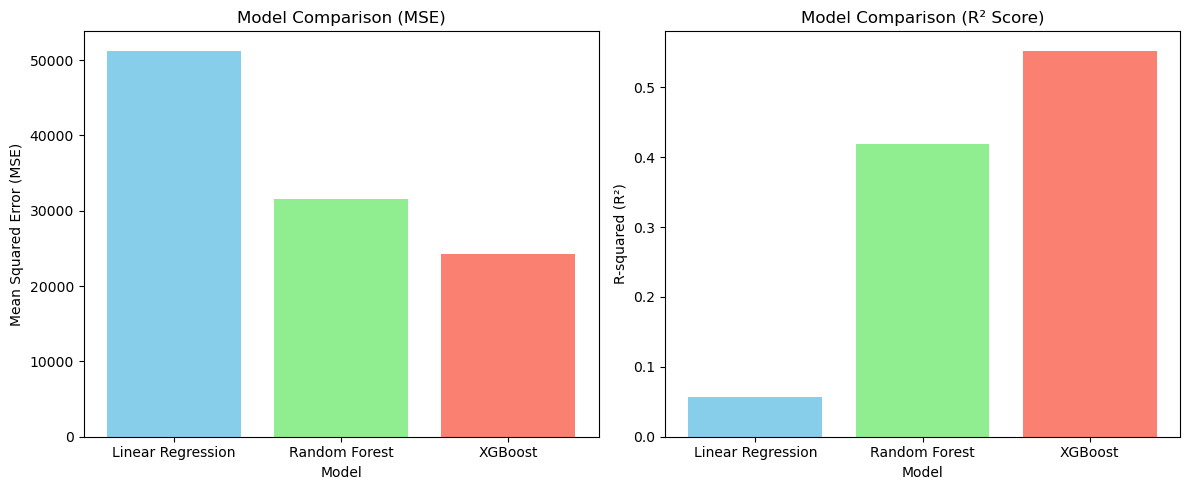

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# Storing the metrics for each model
mse_scores = {
    "Linear Regression": mse_lr,
    "Random Forest": mse_rf,
    "XGBoost": mse_xgb
}

r2_scores = {
    "Linear Regression": r2_lr,
    "Random Forest": r2_rf,
    "XGBoost": r2_xgb
}

# Plotting MSE Comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(mse_scores.keys(), mse_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Comparison (MSE)")
plt.ylabel("Mean Squared Error (MSE)")
plt.xlabel("Model")

# Plotting R-squared Comparison
plt.subplot(1, 2, 2)
plt.bar(r2_scores.keys(), r2_scores.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title("Model Comparison (R² Score)")
plt.ylabel("R-squared (R²)")
plt.xlabel("Model")

# Display plots
plt.tight_layout()
plt.show()
